### Running the previous step in the pipeline: Data pre-processing.


In [11]:
%run ./2.data_pre_processing.ipynb

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 80000
    })
    validation: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 10200
    })
})
{'text': "Your flight has been rescheduled for 10:00 AM tomorrow. Please check the airport's website for any updates or changes.", 'label': 'neutral', 'source': 'meta-llama/Meta-Llama-3.1-8B-Instruct', 'reasoning': 'This text would be classified as "neutral" because it provides factual information about the flight reschedule without any emotional undertones or attempts at politeness. The tone is impersonal and focused solely on conveying the necessary details.'}
{'text': 'I appreciate your interest in our vegetarian options. I can provide you with a list of our current dishes that cater to your dietary preferences.', 'label': 'somewhat

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/magicojayz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['flight reschedul tomorrow pleas check airport websit updat chang', 'happi accommod dietari prefer vegetarian option care craft ensur delici satisfi meal would like recommend dish fit need', 'vegetarian option avail menu chef modifi dish suit dietari need', 'understand frustrat recent tournament result review stand see improv experi', 'best find suitabl replac item look need know look']


## **Check the Basics**
### Let's just check some basic attributes in EDA for our dataset.

In [21]:
def check_nulls(example):
    return {column: not example[column] for column in example}

null_check = training_set.map(check_nulls)
missing_counts = {col: sum(null_check[col]) for col in null_check.column_names}
print("Missing values per column:", missing_counts)


Map:   0%|          | 0/80000 [00:00<?, ? examples/s]

Missing values per column: {'text': 0, 'label': 0, 'source': 0, 'reasoning': 40001}


##### The reasoning label has some NaN values, but we can just ignore that column at all for our task.

##### As we now have our corpus, before and after pre-processing, we can proceed to the exploratory data analysis with both corpus.

In [22]:
training_set = training_set.add_column("clean_text", clean_corpus)
training_set = training_set.add_column("unclean_text", unclean_corpus)


print(training_set[:5])  


{'text': ["Your flight has been rescheduled for 10:00 AM tomorrow. Please check the airport's website for any updates or changes.", "We're happy to accommodate your dietary preferences. Our vegetarian options are carefully crafted to ensure a delicious and satisfying meal. Would you like me to recommend some dishes that fit your needs?", 'Our vegetarian options are available on the menu, and our chef can modify any dish to suit your dietary needs.', "I understand your frustration with the recent tournament results, and I'll review the standings to see what we can do to improve your experience.", "I'll do my best to find a suitable replacement for the item you're looking for, but I need to know more about what you're looking for."], 'label': ['neutral', 'polite', 'neutral', 'somewhat polite', 'somewhat polite'], 'source': ['meta-llama/Meta-Llama-3.1-8B-Instruct', 'meta-llama/Meta-Llama-3.1-8B-Instruct', 'meta-llama/Meta-Llama-3.1-8B-Instruct', 'meta-llama/Meta-Llama-3.1-8B-Instruct', 'm

## **Exploratory Data Analysis**
#### The sections bellow will analyse our dataset

### **Class Distribution**

##### Firstly, let's start by analysing how much classes we have and how well those classes are distributed.

In [ ]:
unique_labels = set(training_set['label'])
print(len(unique_labels))


4


Counter({'neutral': 20000, 'polite': 20000, 'somewhat polite': 20000, 'impolite': 20000})


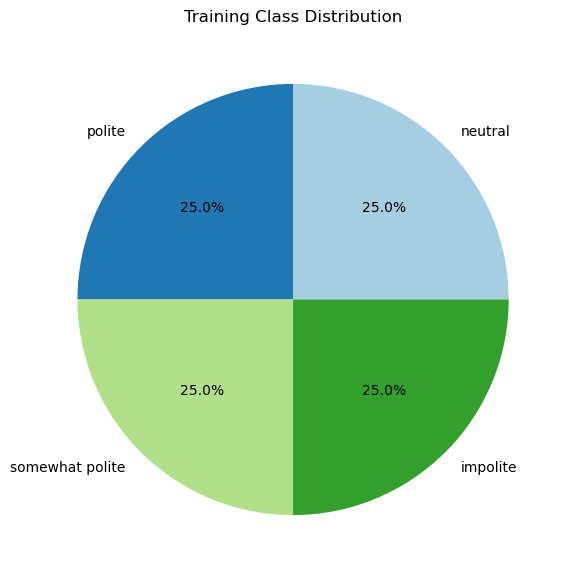

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

label_counts = Counter(training_set["label"])
print(label_counts)

plt.figure(figsize=(7, 7))
plt.pie(label_counts.values(), labels=label_counts.keys(), autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title("Training Class Distribution")
plt.show()


##### As we can see, we have a perfectly balanced dataset as each label has 20000 examples.

### **Counts and Length**

##### It is also important to know the characteristics of the documents we are taking into consideration on this task. 

##### Firstly, let's check the Word Count of each document's text.

First Quartile (Q1) for unclean text: 23.0
Third Quartile (Q3) for unclean text: 38.0
First Quartile (Q1) for clean text: 10.0
Third Quartile (Q3) for clean text: 18.0


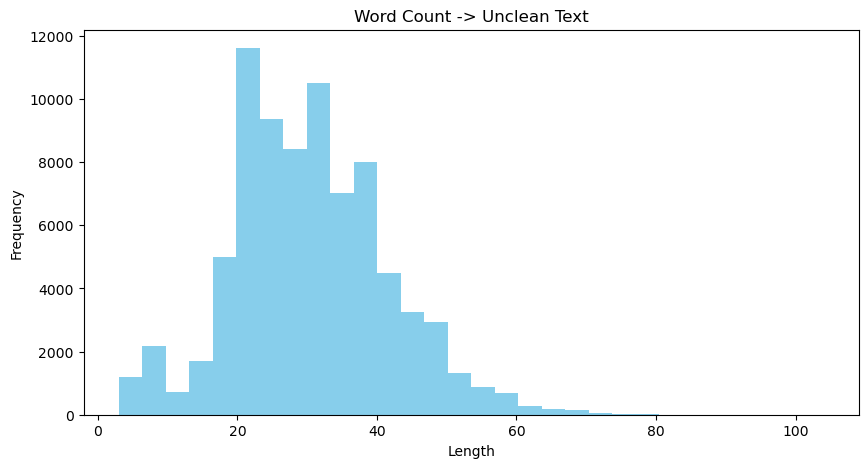

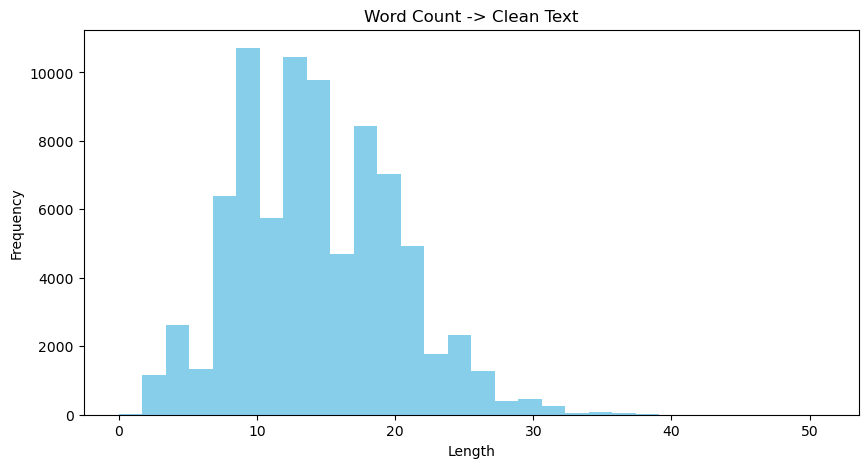

In [36]:
import matplotlib.pyplot as plt

word_count_unclean = [len(text.split()) for text in training_set["unclean_text"]]

plt.figure(figsize=(10, 5))
plt.hist(word_count_unclean, bins=30, color="skyblue")

plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Word Count -> Unclean Text")


Q1_unclean = np.percentile(word_count_unclean, 25)
Q3_unclean = np.percentile(word_count_unclean, 75)

print("First Quartile (Q1) for unclean text:", Q1_unclean)
print("Third Quartile (Q3) for unclean text:", Q3_unclean)


word_count_clean = [len(text.split()) for text in training_set["clean_text"]]
plt.figure(figsize=(10, 5))
plt.hist(word_count_clean, bins=30, color="skyblue")
plt.ylabel("Frequency")
plt.xlabel("Length")
plt.title("Word Count -> Clean Text")

Q1_clean = np.percentile(word_count_clean, 25)
Q3_clean = np.percentile(word_count_clean, 75)

print("First Quartile (Q1) for clean text:", Q1_clean)
print("Third Quartile (Q3) for clean text:", Q3_clean)

# Show the plots
plt.show()


##### Our documents have mostly between 23 and 38 words at the unclean text and 10 and 18 words at the clean text. This is expectable of course as we have a stopwords filter included in our text pre-processing pipeline.

##### We can consider our dataset is composed of small text for this problem. This may affect our decisions and performance of certain algorithms further on this work.

##### Now let's proceed with the character count

First Quartile (Q1) for unclean text: 129.0
Third Quartile (Q3) for unclean text: 217.0
First Quartile (Q1) for clean text: 63.0
Third Quartile (Q3) for clean text: 116.0


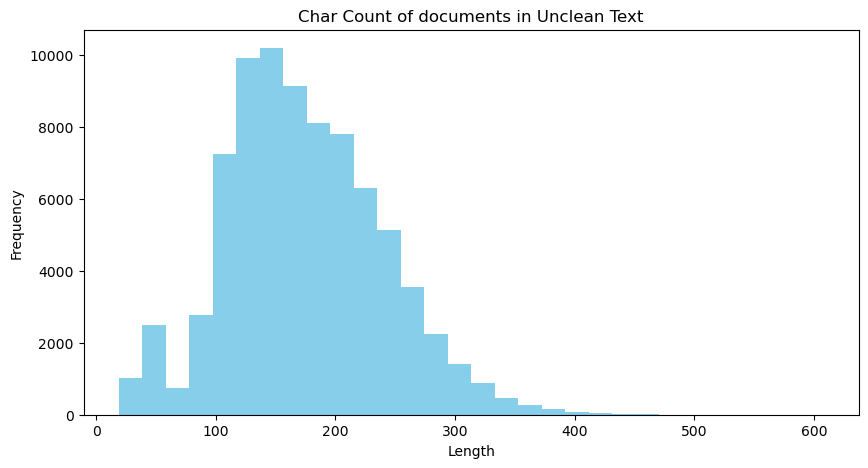

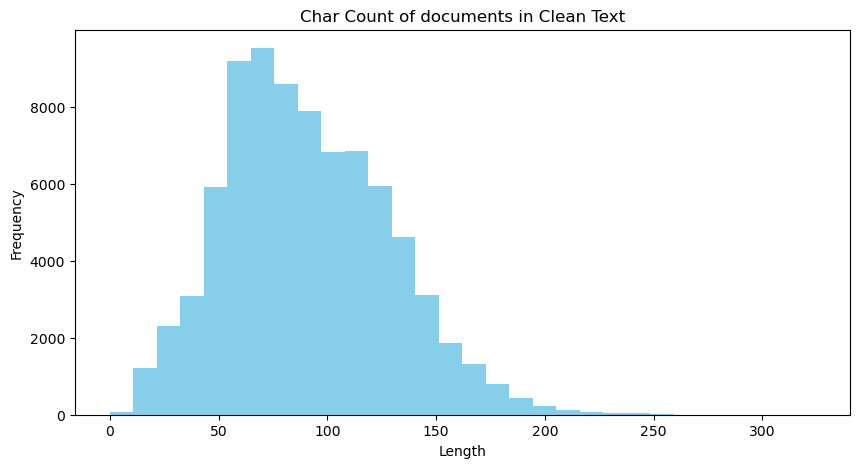

In [ ]:
import matplotlib.pyplot as plt


char_count_unclean = [len(text) for text in training_set["unclean_text"]]
plt.figure(figsize=(10, 5))
plt.hist(char_count_unclean, bins=30, color="skyblue")

plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Char Count of documents in Unclean Text")
Q1_unclean = np.percentile(char_count_unclean, 25)
Q3_unclean = np.percentile(char_count_unclean, 75)

print("First Quartile (Q1) for unclean text:", Q1_unclean)
print("Third Quartile (Q3) for unclean text:", Q3_unclean)

char_count_clean = [len(text) for text in training_set["clean_text"]]
plt.figure(figsize=(10, 5))
plt.hist(char_count_clean, bins=30, color="skyblue")

plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Char Count of documents in Clean Text")
Q1_clean = np.percentile(char_count_clean, 25)
Q3_clean = np.percentile(char_count_clean, 75)

print("First Quartile (Q1) for clean text:", Q1_clean)
print("Third Quartile (Q3) for clean text:", Q3_clean)

# Show the plots
plt.show()


##### Now let's proceed to the average length of words and the average sentence length in terms of number of characters


In [44]:
import numpy as np
from nltk import tokenize

def safe_tokenize(text):
    if isinstance(text, str) and text.strip() != "":  
        return tokenize.sent_tokenize(text)
    else:
        return []  


avg_sentence_length_unclean = np.mean([
    np.mean([len(sent) for sent in safe_tokenize(rev)])
    for rev in training_set["unclean_text"]
])
print("Unclean text average sentence length:", avg_sentence_length_unclean)


avg_sentence_length_clean = np.mean([
    np.mean([len(sent) for sent in safe_tokenize(rev)])
    for rev in training_set["clean_text"]
    if rev.strip() != ""  
])
print("Clean text average sentence length:", avg_sentence_length_clean)


avg_word_length_unclean = np.mean([
    np.mean([len(word) for word in rev.split()])
    for rev in training_set["unclean_text"]
])
print("Unclean text average word length:", avg_word_length_unclean)


avg_word_length_clean = np.mean([
    np.mean([len(word) for word in rev.split()])
    for rev in training_set["clean_text"]
    if rev.strip() != "" 
])
print("Clean text average word length:", avg_word_length_clean)


Unclean text average sentence length: 84.82997663690476
Clean text average sentence length: 90.54438180477256
Unclean text average word length: 4.7908009727635275
Clean text average word length: 5.370793926543045


### **TF-IDF**
##### This is a measure that takes into account the discriminative power of the words (repetitions of a word accross documents/text or power of a word to distinguish the document content) from the vocabulary considering all the documents(our texts), by assigning a weight to each of the terms of the vocabulary.
##### **TF** stands for Term Frequency and is the total frequency that a word appears considering all the documents;
##### **DF** stands for Document Frequency and it measures the number of documents that have a certain word. The higher the more frequent is a word accross all the documents (bad thing -> low discriminative power);
##### **IDF** stands for Inverse Document Frequency and the inverse of the DF. Higher means rarer the word is accross all the documents (good thing -> high discriminative power).
##### **TF-IDF** is a measure that is the product of **TF** and **IDF**:
- ##### Highest when term occurs many times within a small number of documents;
- ##### Lower when the term occurs fewer times in a document, or occurs in many documents;
- ##### Lowest when the term occurs in virtually all documents.


##### This measure is extremely useful in exploratory data analysis as we get a proper information about the most important words in a dataset while reducing the importance of common words that may appear in a large set of documents.
##### As we saw before, our documents are usually small, so TF-IDF may not be able to perform too well in differentiating low and high occurences.

/Users/magicojayz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


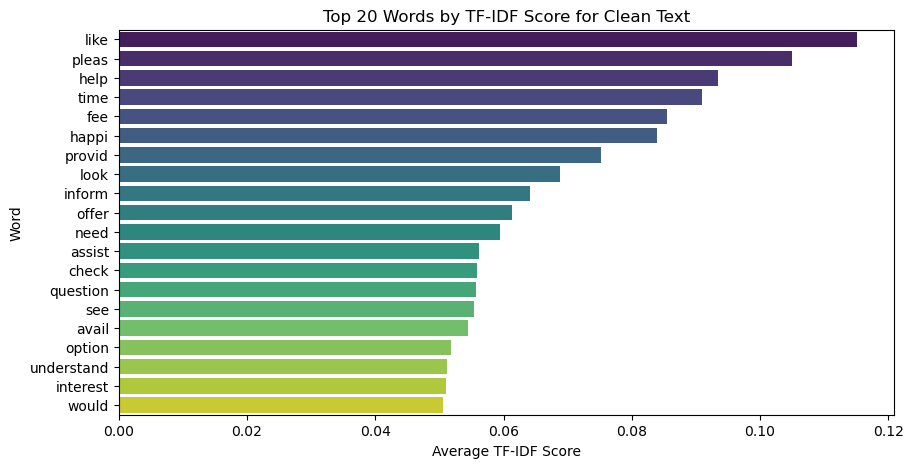

/Users/magicojayz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


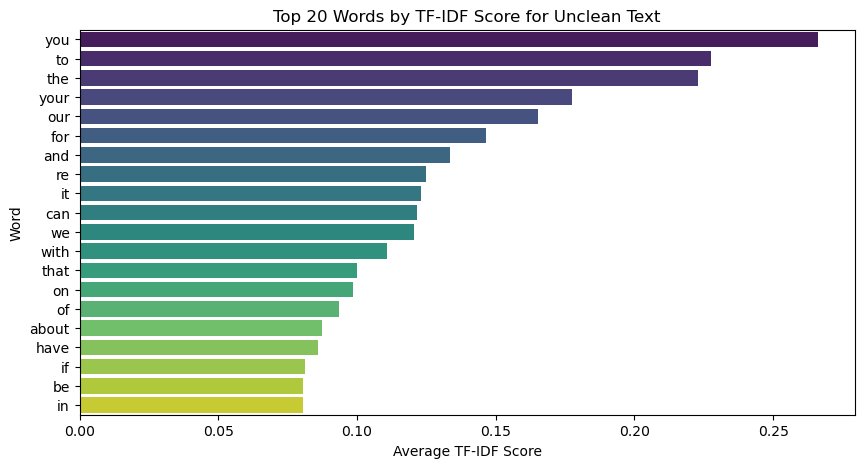

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt


tfidf = TfidfVectorizer(max_features=20) 
tfidf_matrix_clean = tfidf.fit_transform(training_set["clean_text"])
tfidf_mean_clean = tfidf_matrix_clean.mean(axis=0).A1  
words_clean = tfidf.get_feature_names_out()
word_score_clean = dict(zip(words_clean, tfidf_mean_clean))


sorted_word_score_clean = sorted(word_score_clean.items(), key=lambda x: x[1], reverse=True)
words_sorted_clean, scores_sorted_clean = zip(*sorted_word_score_clean)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(scores_sorted_clean), y=list(words_sorted_clean), palette="viridis")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.title("Top 20 Words by TF-IDF Score for Clean Text")
plt.show()

tfidf = TfidfVectorizer(max_features=20) 


tfidf_matrix_unclean = tfidf.fit_transform(training_set["unclean_text"])

tfidf_mean_unclean = tfidf_matrix_unclean.mean(axis=0).A1 
words_unclean = tfidf.get_feature_names_out()
word_score_unclean = dict(zip(words_unclean, tfidf_mean_unclean))

sorted_word_score_unclean = sorted(word_score_unclean.items(), key=lambda x: x[1], reverse=True)
words_sorted_unclean, scores_sorted_unclean = zip(*sorted_word_score_unclean)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(scores_sorted_unclean), y=list(words_sorted_unclean), palette="viridis")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.title("Top 20 Words by TF-IDF Score for Unclean Text")
plt.show()


##### As we can see, at the clean text we can clearly see some words that may have a big impact for our classification task (sentiment analysis) have a high TF-IDF Score, such as "like" and "pleas" which might indicate informal and formal language.
##### As for the unclean text, the majority of the words are stop words that don't seem to have much value.